<a href="https://colab.research.google.com/github/nayoonchoi00/algo2024_PBL_indi/blob/main/PBL_indivi_%EA%B0%9C%EC%84%A0%ED%95%B4%EC%95%BC_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
project = "housingprice"
username = "22011271@sju.ac.kr"
password = "0128"

In [ ]:
import os
import urllib.request

if not os.path.exists("competition.py"):
    url = "https://raw.githubusercontent.com/agtechresearch/LectureAlgorithm/main/competition/competition.py"
    filename = "competition.py"
    urllib.request.urlretrieve(url, filename)

In [ ]:
import competition

# 파일 다운로드
competition.download_competition_files(project)

100%|██████████| 141k/141k [00:00<00:00, 372kiB/s] 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# 경고 무시
warnings.filterwarnings("ignore")

# Data 경로 설정
DATA_DIR = "data"

In [ ]:
# 학습에 사용할 과거 주택매매 data set 로드 (dataset.csv)
dataset = pd.read_csv(os.path.join(DATA_DIR, "dataset.csv"))

# problem set 로드 (problem.csv)
problemset = pd.read_csv(os.path.join(DATA_DIR, "problem.csv"))

In [ ]:
# 변수가 24개가 있으므로, 모든 변수를 출력하려면 다음과 같이 설정해야 함
pd.options.display.max_columns = 30

In [ ]:
dataset['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1335    266500
1336    142125
1337    147500
1338    160000
1339    135000
Name: SalePrice, Length: 1340, dtype: int64

In [ ]:
submission['SalePrice']

0      128092.82
1      123122.75
2      148052.65
3      133758.70
4      100244.83
         ...    
125    261417.81
126    152693.58
127     81701.86
128     69831.83
129    143780.25
Name: SalePrice, Length: 130, dtype: float64

#**데이터 전처리**

In [ ]:
# 결측치를 0으로 대체
dataset = dataset.fillna(0)

# 'id' 열 삭제
dataset.drop('Id', axis=1, inplace=True)
problemset.drop('Id', axis=1, inplace=True)

# 'Street' 열 삭제
dataset.drop('Street', axis=1, inplace=True)
problemset.drop('Street', axis=1, inplace=True)

# 'GarageType' 열 삭제
dataset.drop('GarageType', axis=1, inplace=True)
problemset.drop('GarageType', axis=1, inplace=True)

새로운 특성 생성

In [ ]:
# HouseAge 특성 생성
dataset['HouseAge'] = dataset['YrSold'] - dataset['YearBuilt']
problemset['HouseAge'] = problemset['YrSold'] - problemset['YearBuilt']

# RemodelAge 특성 생성
dataset['RemodelAge'] = dataset['YrSold'] - dataset['YearRemodAdd']
problemset['RemodelAge'] = problemset['YrSold'] - problemset['YearRemodAdd']

# OverallQuality 특성 생성
dataset['OverallQuality'] = (dataset['OverallQual'] + dataset['OverallCond']) / 2
problemset['OverallQuality'] = (problemset['OverallQual'] + problemset['OverallCond']) / 2

# Have2ndFloor (2층이 있는 지를 나타내는) 새로운 특성 추가
dataset['Have2ndFloor'] = dataset['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
problemset['Have2ndFloor'] = problemset['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)

# HaveGarage 특성 추가
dataset['HaveGarage'] = dataset['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
problemset['HaveGarage'] = problemset['GarageArea'].apply(lambda x: 1 if x > 0 else 0)

상관관계 파악

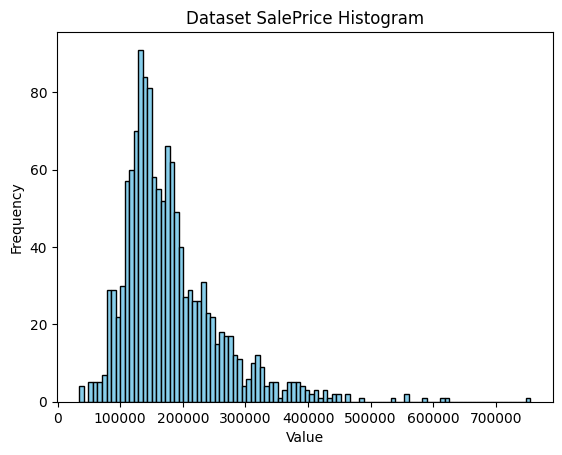

In [ ]:
import matplotlib.pyplot as plt

# 히스토그램 그리기
plt.hist(dataset['SalePrice'], bins=100, color='skyblue', edgecolor='black')  # bins는 막대의 갯수를 결정합니다.
plt.xlabel('Value')  # x축 레이블 설정
plt.ylabel('Frequency')  # y축 레이블 설정
plt.title('Dataset SalePrice Histogram')  # 히스토그램 제목 설정
plt.show()

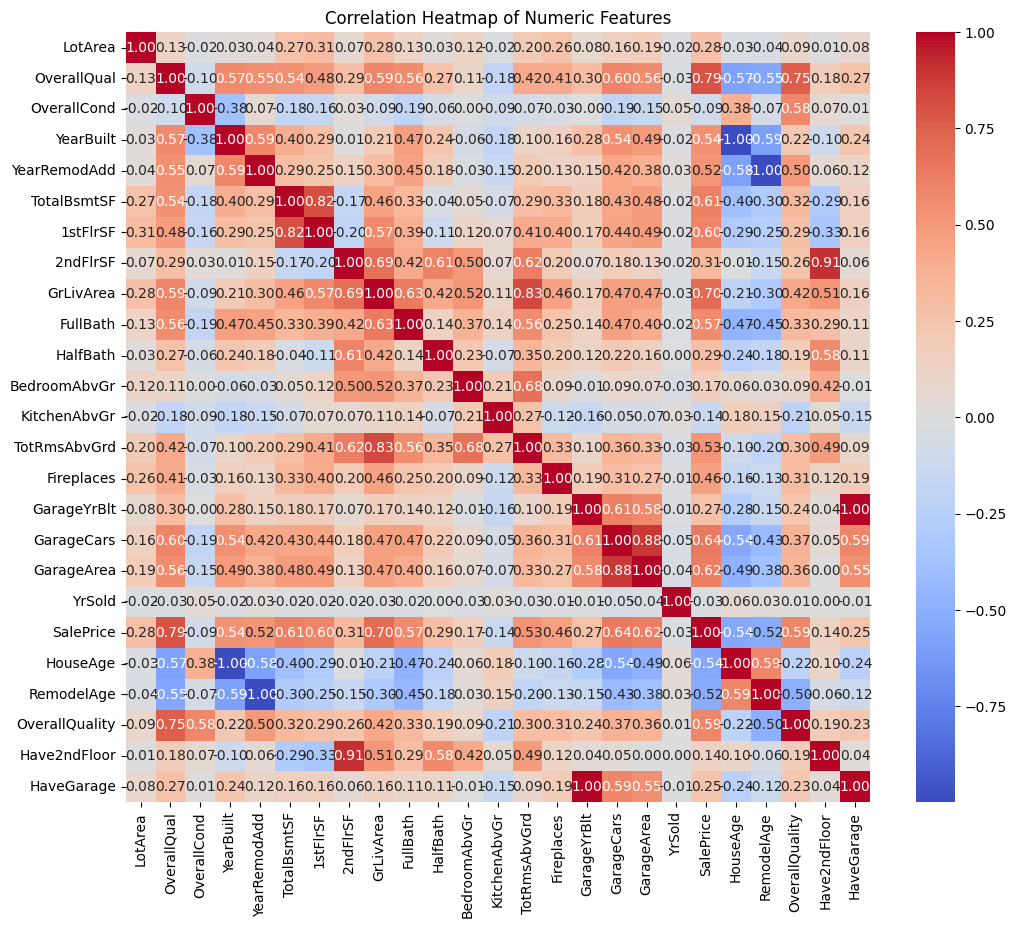

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 수치형 열만 선택
numeric_columns = dataset.select_dtypes(include=['int64', 'float64'])

# 수치형 열 간의 상관 관계 행렬 계산
correlation_matrix = numeric_columns.corr()

# 히트맵 그리기
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

# OverallQual, GrLivArea 와 SalePrice 간 높은 상관관계

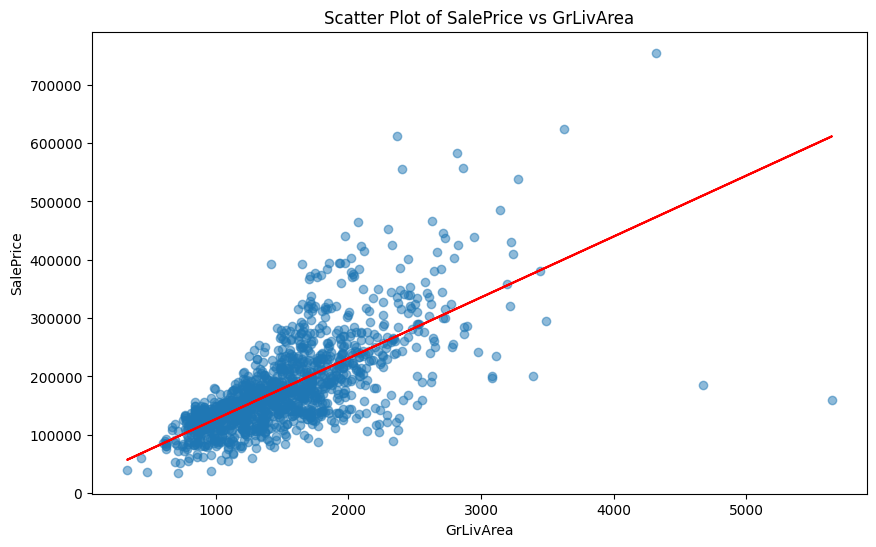

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# SalePrice와 GrLivArea 간의 선형 회귀 모델 학습
X = dataset[['GrLivArea']]
y = dataset['SalePrice']
model = LinearRegression().fit(X, y)

# 산점도 그리기
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5)

# 추세선 그리기
plt.plot(X, model.predict(X), color='red')

plt.title('Scatter Plot of SalePrice vs GrLivArea')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

# 처리해야 할 이상치 값을 확인할 수 있음.

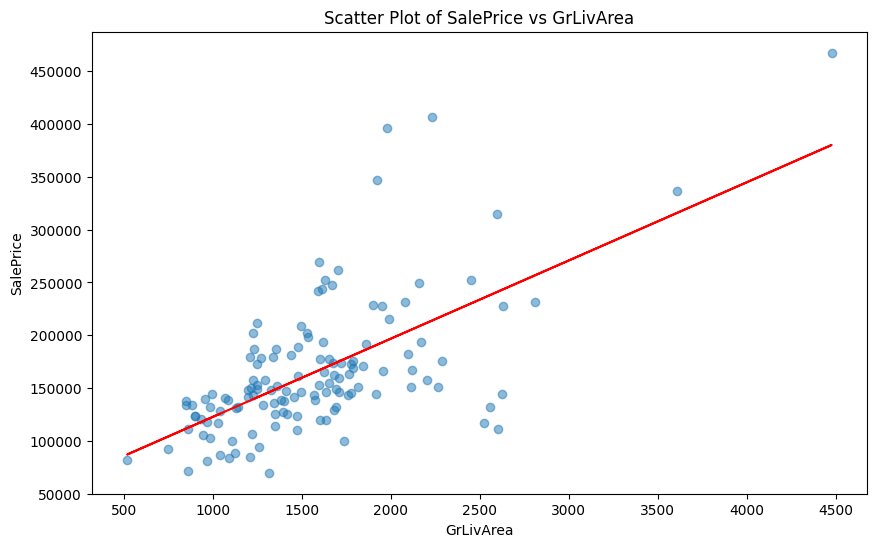

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# SalePrice와 GrLivArea 간의 선형 회귀 모델 학습
X = problemset[['GrLivArea']]
y = submission['SalePrice']
model = LinearRegression().fit(X, y)

# 산점도 그리기
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5)

# 추세선 그리기
plt.plot(X, model.predict(X), color='red')

plt.title('Scatter Plot of SalePrice vs GrLivArea')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

# 처리해야 할 이상치 값을 확인할 수 있음.

In [ ]:
submission

,Id,SalePrice
0,1341,128092.82
1,1342,123122.75
2,1343,148052.65
3,1344,133758.70
4,1345,100244.83
...,...,...
125,1466,261417.81
126,1467,152693.58
127,1468,81701.86
128,1469,69831.83


Lambda Value: 0.009415992993856287


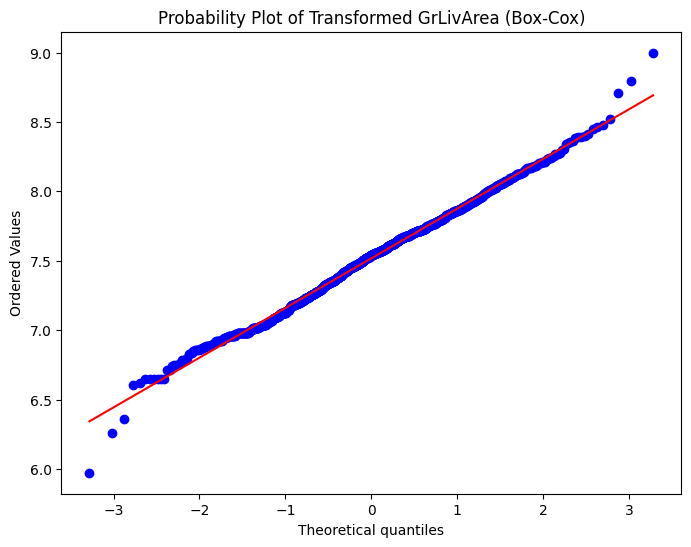

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats

# Box-Cox 변환 적용할 변수 선택
# Box-Cox 변환은 데이터의 분포를 정규 분포에 가깝게 만들기 위해 사용됨
transformed_GrLivArea, lambda_value = stats.boxcox(dataset['GrLivArea'])

# 변환된 데이터 확인
print("Lambda Value:", lambda_value)

# 확률 플롯 그리기
# 확률 플롯(probability plot)은 데이터가 정규 분포를 따르는지 확인하는 데 사용됨.
plt.figure(figsize=(8, 6))
stats.probplot(transformed_GrLivArea, dist="norm", plot=plt)
plt.title("Probability Plot of Transformed GrLivArea (Box-Cox)")
plt.xlabel("Theoretical quantiles")
plt.ylabel("Ordered Values")
plt.show()

dataset['GrLivArea'] = transformed_GrLivArea

In [ ]:
transformed_GrLivArea_problemset, lambda_value_ps = stats.boxcox(problemset['GrLivArea'])
problemset['GrLivArea'] = transformed_GrLivArea_problemset

이상치 제거

In [ ]:
import numpy as np

# 선택한 특성과 주택가격(SalePrice)의 상관관계 확인 후 높은 상관관계를 보이는 특성 선택
# 선택한 두 특성에 대한 z-score 계산
# z-score는 해당 특성의 각 값이 평균으로부터 얼마나 떨어져 있는지를 나타냄.
z_scores_1 = stats.zscore(dataset['GrLivArea'])
z_scores_2 = stats.zscore(dataset['OverallQual'])

# 보통 표준 정규 분포에서 95%의 값은 z-score가 -2부터 +2 사이에 위치함
# 절댓값이 3 이상인 인덱스 찾기
outlier_indices_1 = np.where(np.abs(z_scores_1) >= 3)[0]
outlier_indices_2 = np.where(np.abs(z_scores_2) >= 3)[0]

# 두 특성에서 모두 아웃라이어인 인덱스 찾기
common_outlier_indices = np.intersect1d(outlier_indices_1, outlier_indices_2)

# GrLivArea에 대한 아웃라이어 제거
outlier_indices_1 = np.where(np.abs(z_scores_1) >= 3)[0]
cleaned_dataset_1 = dataset.drop(outlier_indices_1)

# OverallQual에 대한 아웃라이어 제거
outlier_indices_2 = np.where(np.abs(z_scores_2) >= 3)[0]
cleaned_dataset_2 = dataset.drop(outlier_indices_2)

# 두 특성에 대한 아웃라이어 제거
common_outlier_indices = np.union1d(outlier_indices_1, outlier_indices_2)
cleaned_dataset = dataset.drop(common_outlier_indices)


# 결과 출력
print("Original dataset size:", dataset.shape)
print("Cleaned dataset 1 size:", cleaned_dataset_1.shape)
print("Cleaned dataset 2 size:", cleaned_dataset_2.shape)
print("Cleaned dataset size:", cleaned_dataset.shape)

Original dataset size: (1340, 26)
Cleaned dataset 1 size: (1334, 26)
Cleaned dataset 2 size: (1338, 26)
Cleaned dataset size: (1333, 26)


범주형 값으로 변환

In [ ]:
'''
import pandas as pd

# 원-핫 인코딩 적용
# 선형에서 범주형 값으로 변환하는 방법은 일반적으로 원-핫 인코딩(One-Hot Encoding)을 사용
# 선형 모델의 경우 이상치에 민감. 이런 경우 선형 값을 범주형으로 변환하여 이상치의 영향을 줄일 수 있음.
encoded_dataset = pd.get_dummies(cleaned_dataset, columns=['BedroomAbvGr', 'KitchenAbvGr'])
encoded_problemset = pd.get_dummies(problemset, columns=['BedroomAbvGr', 'KitchenAbvGr'])
# 결과 출력
encoded_dataset
'''

"\nimport pandas as pd\n\n# 원-핫 인코딩 적용\n# 선형에서 범주형 값으로 변환하는 방법은 일반적으로 원-핫 인코딩(One-Hot Encoding)을 사용\n# 선형 모델의 경우 이상치에 민감. 이런 경우 선형 값을 범주형으로 변환하여 이상치의 영향을 줄일 수 있음.\nencoded_dataset = pd.get_dummies(cleaned_dataset, columns=['BedroomAbvGr', 'KitchenAbvGr'])\nencoded_problemset = pd.get_dummies(problemset, columns=['BedroomAbvGr', 'KitchenAbvGr'])\n# 결과 출력\nencoded_dataset\n"

In [ ]:
'''encoded_problemset'''

'encoded_problemset'

더미 변수 변환

In [ ]:
cleaned_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1333 entries, 0 to 1339
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LotArea         1333 non-null   int64  
 1   LotConfig       1333 non-null   object 
 2   OverallQual     1333 non-null   int64  
 3   OverallCond     1333 non-null   int64  
 4   YearBuilt       1333 non-null   int64  
 5   YearRemodAdd    1333 non-null   int64  
 6   TotalBsmtSF     1333 non-null   int64  
 7   1stFlrSF        1333 non-null   int64  
 8   2ndFlrSF        1333 non-null   int64  
 9   GrLivArea       1333 non-null   float64
 10  FullBath        1333 non-null   int64  
 11  HalfBath        1333 non-null   int64  
 12  BedroomAbvGr    1333 non-null   int64  
 13  KitchenAbvGr    1333 non-null   int64  
 14  TotRmsAbvGrd    1333 non-null   int64  
 15  Fireplaces      1333 non-null   int64  
 16  GarageYrBlt     1333 non-null   float64
 17  GarageCars      1333 non-null   int64 

In [ ]:
problemset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LotArea         130 non-null    int64  
 1   LotConfig       130 non-null    object 
 2   OverallQual     130 non-null    int64  
 3   OverallCond     130 non-null    int64  
 4   YearBuilt       130 non-null    int64  
 5   YearRemodAdd    130 non-null    int64  
 6   TotalBsmtSF     130 non-null    int64  
 7   1stFlrSF        130 non-null    int64  
 8   2ndFlrSF        130 non-null    int64  
 9   GrLivArea       130 non-null    float64
 10  FullBath        130 non-null    int64  
 11  HalfBath        130 non-null    int64  
 12  BedroomAbvGr    130 non-null    int64  
 13  KitchenAbvGr    130 non-null    int64  
 14  TotRmsAbvGrd    130 non-null    int64  
 15  Fireplaces      130 non-null    int64  
 16  GarageYrBlt     130 non-null    int64  
 17  GarageCars      130 non-null    int

In [ ]:
# cleaned_dataset 더미변수 변환
# object type 열 선택
categorical_columns = ['LotConfig']

# 각 카테고리형 열에 대해 더미 변수 생성
dummies = pd.get_dummies(cleaned_dataset[categorical_columns], columns=categorical_columns)

# 기존 데이터프레임과 더미 변수를 합치기
dataset = pd.concat([cleaned_dataset, dummies], axis=1)

# 더미 변수의 True/False를 1/0으로 변환
dataset.replace({True: 1, False: 0}, inplace=True)

# 원래 열 삭제
dataset.drop(categorical_columns, axis=1, inplace=True)

In [ ]:
# problemset 더미변수 변환
# object type 열 선택
categorical_columns = ['LotConfig']

# 각 카테고리형 열에 대해 더미 변수 생성
dummies = pd.get_dummies(problemset[categorical_columns], columns=categorical_columns)

# 기존 데이터프레임과 더미 변수를 합치기
problemset = pd.concat([problemset, dummies], axis=1)

# 더미 변수의 True/False를 1/0으로 변환
problemset.replace({True: 1, False: 0}, inplace=True)

# 원래 열 삭제
problemset.drop(categorical_columns, axis=1, inplace=True)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1333 entries, 0 to 1339
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LotArea            1333 non-null   int64  
 1   OverallQual        1333 non-null   int64  
 2   OverallCond        1333 non-null   int64  
 3   YearBuilt          1333 non-null   int64  
 4   YearRemodAdd       1333 non-null   int64  
 5   TotalBsmtSF        1333 non-null   int64  
 6   1stFlrSF           1333 non-null   int64  
 7   2ndFlrSF           1333 non-null   int64  
 8   GrLivArea          1333 non-null   float64
 9   FullBath           1333 non-null   int64  
 10  HalfBath           1333 non-null   int64  
 11  BedroomAbvGr       1333 non-null   int64  
 12  KitchenAbvGr       1333 non-null   int64  
 13  TotRmsAbvGrd       1333 non-null   int64  
 14  Fireplaces         1333 non-null   int64  
 15  GarageYrBlt        1333 non-null   float64
 16  GarageCars         1333 non-n

In [ ]:
problemset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LotArea            130 non-null    int64  
 1   OverallQual        130 non-null    int64  
 2   OverallCond        130 non-null    int64  
 3   YearBuilt          130 non-null    int64  
 4   YearRemodAdd       130 non-null    int64  
 5   TotalBsmtSF        130 non-null    int64  
 6   1stFlrSF           130 non-null    int64  
 7   2ndFlrSF           130 non-null    int64  
 8   GrLivArea          130 non-null    float64
 9   FullBath           130 non-null    int64  
 10  HalfBath           130 non-null    int64  
 11  BedroomAbvGr       130 non-null    int64  
 12  KitchenAbvGr       130 non-null    int64  
 13  TotRmsAbvGrd       130 non-null    int64  
 14  Fireplaces         130 non-null    int64  
 15  GarageYrBlt        130 non-null    int64  
 16  GarageCars         130 non

#**모델학습**

RandomForest

In [ ]:
# 학습 데이터의 SalePrice 열을 제외한 나머지 열을 X로 지정, SalePrice 열을 Y로 지정
X_RF = dataset.drop("SalePrice", axis=1)
Y_RF = dataset["SalePrice"]

# 모델 학습을 위해 학습 데이터를 80%의 학습 데이터(train)와 20%의 검증 데이터(test)로 나눔
from sklearn.model_selection import train_test_split

x_train_RF, x_test_RF, y_train_RF, y_test_RF = train_test_split(X_RF, Y_RF, test_size=0.2)

# 랜덤 포레스트 모델을 사용하여 학습
from sklearn.ensemble import RandomForestRegressor

model_RF = RandomForestRegressor()
model_RF.fit(x_train_RF, y_train_RF)

# train 데이터와 test 데이터에 대한 예측값을 구하고 RMSE 값을 계산
from sklearn.metrics import mean_squared_error

train_pred_RF = model_RF.predict(x_train_RF)
test_pred_RF = model_RF.predict(x_test_RF)

print("Train RMSE :", mean_squared_error(y_train_RF, train_pred_RF) ** 0.5)
print("Test RMSE :", mean_squared_error(y_test_RF, test_pred_RF) ** 0.5)

Train RMSE : 9698.728101758104
Test RMSE : 31088.65970271588


In [ ]:
# 문제 데이터(problem data)에 대한 예측값을 구함
problem_pred = model_RF.predict(problemset)

# 리더보드 서버 제출을 위한 파일 생성
submission = pd.read_csv(os.path.join(DATA_DIR, "submission.csv"))
submission["SalePrice"] = problem_pred

# 예측 결과 화면에 출력 후 제출
display(submission)
competition.submit(project, username, password, submission)

,Id,SalePrice
0,1341,135044.91
1,1342,124509.71
2,1343,152609.50
3,1344,133019.00
4,1345,97132.43
...,...,...
125,1466,273591.69
126,1467,153926.25
127,1468,86773.36
128,1469,82018.08


아이디:  22011271@sju.ac.kr
파일명:  submissions/20240514-152106-submission.csv
[제출에 성공하였습니다]
제출 결과: 50318.156419664774


Gradient Boosting

In [ ]:
# 학습 데이터의 SalePrice 열을 제외한 나머지 열을 X로 지정, SalePrice 열을 Y로 지정
X_GB = dataset.drop("SalePrice", axis=1)
Y_GB = dataset["SalePrice"]

# 모델 학습을 위해 학습 데이터를 80%의 학습 데이터(train)와 20%의 검증 데이터(test)로 나눔
from sklearn.model_selection import train_test_split

x_train_GB, x_test_GB, y_train_GB, y_test_GB = train_test_split(X_GB, Y_GB, test_size=0.2)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting 모델 생성 및 학습
model_GB = GradientBoostingRegressor()
model_GB.fit(x_train_GB, y_train_GB)

# 테스트 데이터에 대한 예측 수행
y_pred_GB = model_GB.predict(x_test_GB)

In [ ]:
# train 데이터와 test 데이터에 대한 예측값을 구하고 RMSE 값을 계산
from sklearn.metrics import mean_squared_error

train_pred_GB = model_GB.predict(x_train_GB)
test_pred_GB = model_GB.predict(x_test_GB)

print("Train RMSE :", mean_squared_error(y_train_GB, train_pred_GB) ** 0.5)
print("Test RMSE :", mean_squared_error(y_test_GB, test_pred_GB) ** 0.5)

Train RMSE : 16025.218168451183
Test RMSE : 24926.37401966529


In [ ]:
# 문제 데이터(problem data)에 대한 예측값을 구함
problem_pred = model_GB.predict(problemset)

# 리더보드 서버 제출을 위한 파일 생성
submission = pd.read_csv(os.path.join(DATA_DIR, "submission.csv"))
submission["SalePrice"] = problem_pred

# 예측 결과 화면에 출력 후 제출
display(submission)
competition.submit(project, username, password, submission)

,Id,SalePrice
0,1341,125813.163195
1,1342,129623.505237
2,1343,150221.180226
3,1344,133306.587565
4,1345,101655.651991
...,...,...
125,1466,269674.185345
126,1467,167629.638078
127,1468,74301.174780
128,1469,65662.099016


아이디:  22011271@sju.ac.kr
파일명:  submissions/20240514-152109-submission.csv
[제출에 성공하였습니다]
제출 결과: 49093.464229877616


Ridge 회귀

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# 학습 데이터의 SalePrice 열을 제외한 나머지 열을 X로 지정, SalePrice 열을 Y로 지정
X_R = dataset.drop("SalePrice", axis=1)
Y_R = dataset["SalePrice"]

# 모델 학습을 위해 학습 데이터를 80%의 학습 데이터(train)와 20%의 검증 데이터(test)로 나눔
from sklearn.model_selection import train_test_split

x_train_R, x_test_R, y_train_R, y_test_R = train_test_split(X_R, Y_R, test_size=0.2)

# Ridge 모델 객체 생성
ridge_model = Ridge(alpha=1.0)  # alpha는 규제 강도를 조절하는 하이퍼파라미터입니다. 기본값은 1.0입니다.

# 모델 학습
ridge_model.fit(x_train_R, y_train_R)  # X_train은 특성, y_train은 타깃입니다.

# 모델 예측
y_pred_R = ridge_model.predict(x_test_R)  # X_test는 테스트 데이터의 특성입니다.

# 모델 평가 (예시로 RMSE 사용)
mse = mean_squared_error(y_test_R, y_pred_R)
rmse = np.sqrt(mse)
print("RMSE:", rmse)


RMSE: 32868.9711922379


In [ ]:
# 문제 데이터(problem data)에 대한 예측값을 구함
problem_pred = ridge_model.predict(problemset)

# 리더보드 서버 제출을 위한 파일 생성
submission = pd.read_csv(os.path.join(DATA_DIR, "submission.csv"))
submission["SalePrice"] = problem_pred

# 예측 결과 화면에 출력 후 제출
display(submission)
competition.submit(project, username, password, submission)

,Id,SalePrice
0,1341,260541.706339
1,1342,260360.358726
2,1343,313531.185944
3,1344,287749.401538
4,1345,239712.481306
...,...,...
125,1466,433783.224965
126,1467,350966.808787
127,1468,196656.169217
128,1469,221093.985123


아이디:  22011271@sju.ac.kr
파일명:  submissions/20240514-152110-submission.csv
[제출에 성공하였습니다]
제출 결과: 159522.53680305587


Lasso 회귀

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# 학습 데이터의 SalePrice 열을 제외한 나머지 열을 X로 지정, SalePrice 열을 Y로 지정
X_L = dataset.drop("SalePrice", axis=1)
Y_L = dataset["SalePrice"]

# 모델 학습을 위해 학습 데이터를 80%의 학습 데이터(train)와 20%의 검증 데이터(test)로 나눔
from sklearn.model_selection import train_test_split

x_train_L, x_test_L, y_train_L, y_test_L = train_test_split(X_L, Y_L, test_size=0.2)

# Lasso 모델 객체 생성
lasso_model = Lasso(alpha=1.0)  # alpha는 규제 강도를 조절하는 하이퍼파라미터입니다. 기본값은 1.0입니다.

# 모델 학습
lasso_model.fit(x_train_L, y_train_L)  # X_train은 특성, y_train은 타깃입니다.

# 모델 예측
y_pred_L = lasso_model.predict(x_test_L)  # X_test는 테스트 데이터의 특성입니다.

# 모델 평가 (예시로 RMSE 사용)
mse = mean_squared_error(y_test_L, y_pred_L)
rmse = np.sqrt(mse)
print("RMSE:", rmse)


RMSE: 28797.61061813921


In [ ]:
# 문제 데이터(problem data)에 대한 예측값을 구함
problem_pred = lasso_model.predict(problemset)

# 리더보드 서버 제출을 위한 파일 생성
submission = pd.read_csv(os.path.join(DATA_DIR, "submission.csv"))
submission["SalePrice"] = problem_pred

# 예측 결과 화면에 출력 후 제출
display(submission)
competition.submit(project, username, password, submission)

,Id,SalePrice
0,1341,341062.496219
1,1342,343112.323790
2,1343,402004.050910
3,1344,368569.229007
4,1345,324900.242648
...,...,...
125,1466,531279.759326
126,1467,442843.052911
127,1468,277887.051854
128,1469,306121.856000


아이디:  22011271@sju.ac.kr
파일명:  submissions/20240514-152112-submission.csv
[제출에 성공하였습니다]
제출 결과: 250199.83504726295


ElasticNet 회귀

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

# 학습 데이터의 SalePrice 열을 제외한 나머지 열을 X로 지정, SalePrice 열을 Y로 지정
X_EN = dataset.drop("SalePrice", axis=1)
Y_EN = dataset["SalePrice"]

# 모델 학습을 위해 학습 데이터를 80%의 학습 데이터(train)와 20%의 검증 데이터(test)로 나눔
from sklearn.model_selection import train_test_split

x_train_EN, x_test_EN, y_train_EN, y_test_EN = train_test_split(X_EN, Y_EN, test_size=0.2)

# ElasticNet 모델 객체 생성
elasticnet_model = ElasticNet(alpha=1.0, l1_ratio=0.5)  # alpha는 규제 강도를 조절하는 하이퍼파라미터입니다. 기본값은 1.0입니다.
                                                         # l1_ratio는 L1 규제의 비율을 의미합니다. 0부터 1까지의 값을 가질 수 있습니다.

# 모델 학습
elasticnet_model.fit(x_train_EN, y_train_EN)  # X_train_EN은 특성, y_train_EN은 타깃입니다.

# 모델 예측
y_pred_EN = elasticnet_model.predict(x_test_EN)  # X_test는 테스트 데이터의 특성입니다.

# 모델 평가 (예시로 RMSE 사용)
mse = mean_squared_error(y_test_EN, y_pred_EN)
rmse = np.sqrt(mse)
print("RMSE:", rmse)


RMSE: 29339.888220550787


In [ ]:
# 문제 데이터(problem data)에 대한 예측값을 구함
problem_pred = elasticnet_model.predict(problemset)

# 리더보드 서버 제출을 위한 파일 생성
submission = pd.read_csv(os.path.join(DATA_DIR, "submission.csv"))
submission["SalePrice"] = problem_pred

# 예측 결과 화면에 출력 후 제출
display(submission)
competition.submit(project, username, password, submission)

,Id,SalePrice
0,1341,123573.132967
1,1342,124610.296318
2,1343,168420.028879
3,1344,138856.818734
4,1345,95719.912625
...,...,...
125,1466,276385.492131
126,1467,199154.196765
127,1468,41950.864357
128,1469,76372.278654


아이디:  22011271@sju.ac.kr
파일명:  submissions/20240514-152114-submission.csv
[제출에 성공하였습니다]
제출 결과: 37810.34402976403


## Problem set 문제에 대한 집값예측 및 리더보드 결과 제출

In [ ]:
'''
# 문제 데이터(problem data)에 대한 예측값을 구함
problem_pred = model_GB.predict(problemset)
'''

'\n# 문제 데이터(problem data)에 대한 예측값을 구함\nproblem_pred = model_GB.predict(problemset)\n'

In [ ]:
'''
# 문제 데이터(problem data)에 대한 예측값을 구함
problem_pred = model_GB.predict(problemset)

# 리더보드 서버 제출을 위한 파일 생성
submission = pd.read_csv(os.path.join(DATA_DIR, "submission.csv"))
submission["SalePrice"] = problem_pred

# 예측 결과 화면에 출력 후 제출
display(submission)
competition.submit(project, username, password, submission)
'''

'\n# 문제 데이터(problem data)에 대한 예측값을 구함\nproblem_pred = model_GB.predict(problemset)\n\n# 리더보드 서버 제출을 위한 파일 생성\nsubmission = pd.read_csv(os.path.join(DATA_DIR, "submission.csv"))\nsubmission["SalePrice"] = problem_pred\n\n# 예측 결과 화면에 출력 후 제출\ndisplay(submission)\ncompetition.submit(project, username, password, submission)\n'